# Sharpe Ratio and Portfolio Values

In [2]:
import pandas as pd

In [3]:
import quandl

## Create a Portfolio

In [4]:
start = pd.to_datetime('2017-03-06')
end = pd.to_datetime('2017-09-07')

In [5]:
quandl.ApiConfig.api_key = "PfQeZrbzCyva3_7RfQ7h"
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [6]:
# Alternative
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [7]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Normalize Prices

This is the same as cumulative daily returns

In [8]:
# Example
aapl.iloc[0]['Adj. Close']

138.21132621523

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [10]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2017-03-06,138.211326,1.000000
2017-03-07,138.389868,1.001292
2017-03-08,137.874080,0.997560
2017-03-09,137.556672,0.995263
2017-03-10,138.012946,0.998565


In [11]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2017-08-31,164.00,1.186589
2017-09-01,164.05,1.186950
2017-09-05,162.08,1.172697
2017-09-06,161.91,1.171467
2017-09-07,161.26,1.166764


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [12]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):  #all the appl * 0.3, then all the data from cisco * 0.2
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [13]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2017-03-06,138.211326,1.000000,0.300000
2017-03-07,138.389868,1.001292,0.300388
2017-03-08,137.874080,0.997560,0.299268
2017-03-09,137.556672,0.995263,0.298579
2017-03-10,138.012946,0.998565,0.299569


## Investment

Let's pretend we invested a million dollars in this portfolio

In [14]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [15]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [16]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2017-03-06,300000.000000,200000.000000,400000.000000,100000.000000
2017-03-07,300387.541266,200058.496636,399800.520862,99930.310296
2017-03-08,299267.977609,199005.557180,397739.236438,100459.479571
2017-03-09,298579.015358,199298.040363,392707.929296,100754.774926
2017-03-10,299569.398593,200409.476455,394148.611958,100690.991129


In [17]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [18]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2017-03-06,300000.000000,200000.000000,400000.000000,100000.000000
2017-03-07,300387.541266,200058.496636,399800.520862,99930.310296
2017-03-08,299267.977609,199005.557180,397739.236438,100459.479571
2017-03-09,298579.015358,199298.040363,392707.929296,100754.774926
2017-03-10,299569.398593,200409.476455,394148.611958,100690.991129


In [19]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [20]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2017-03-06,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2017-03-07,300387.541266,200058.496636,399800.520862,99930.310296,1.000177e+06
2017-03-08,299267.977609,199005.557180,397739.236438,100459.479571,9.964723e+05
2017-03-09,298579.015358,199298.040363,392707.929296,100754.774926,9.913398e+05
2017-03-10,299569.398593,200409.476455,394148.611958,100690.991129,9.948185e+05


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,u'Total Portfolio Value')

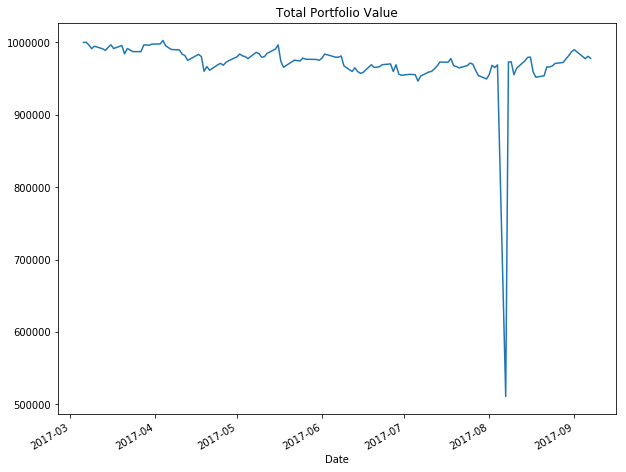

In [22]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

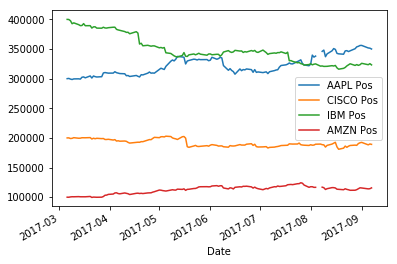

In [23]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [24]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2017-08-31,355976.614560,191824.768116,323503.050869,115826.649815,987131.083361
2017-09-01,356085.144016,192479.866673,325877.924696,115549.072182,989992.007566
2017-09-05,351809.083463,188311.057679,323525.668715,114015.898702,977661.708559
2017-09-06,351440.083314,189799.918034,325289.860701,114314.737601,980844.599649
2017-09-07,350029.200390,189144.819478,323209.018872,115693.176315,978076.215055


# Portfolio Statistics
### Daily Returns

In [25]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Cumulative Return

In [26]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return -2.19237849455 was percent!


### Avg Daily Return

In [27]:
portfolio_val['Daily Return'].mean()

0.003167836299714611

### Std Daily Return

In [28]:
portfolio_val['Daily Return'].std()

0.09044597848553317

In [ ]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [29]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [30]:
SR

0.03502462301539815

In [31]:
ASR = (252**0.5)*SR

In [32]:
ASR

0.5559986535751962

In [33]:
portfolio_val['Daily Return'].std()

0.09044597848553317

In [34]:
portfolio_val['Daily Return'].mean()

0.003167836299714611

In [ ]:
portfolio_val['Daily Return'].plot('kde')

In [ ]:
aapl['Adj. Close'].pct_change(1).plot('kde')
ibm['Adj. Close'].pct_change(1).plot('kde')
amzn['Adj. Close'].pct_change(1).plot('kde')
cisco['Adj. Close'].pct_change(1).plot('kde')

In [ ]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

# Great Job!